### Stock Market Prediction And Forecasting Using Stacked LSTM

In [8]:
### Data Collection
import pandas_datareader as pdr
key="981eeb65aea3c15677838ae8b5fdaa6caf694499"

In [9]:
df = pdr.get_data_tiingo('TSLA', api_key=key)

C:\Users\Ishaan\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [10]:
df.to_csv('TSLA.csv')

In [11]:
import pandas as pd

In [12]:
df=pd.read_csv('TSLA.csv')

In [13]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2018-06-25 00:00:00+00:00,333.01,338.47,327.50,330.12,6931304,22.200667,22.564667,21.833333,22.008000,103969560,0.0,1.0
1,TSLA,2018-06-26 00:00:00+00:00,342.00,343.55,325.80,336.05,7452487,22.800000,22.903333,21.720000,22.403333,111787305,0.0,1.0
2,TSLA,2018-06-27 00:00:00+00:00,344.50,350.79,339.50,345.00,8333727,22.966667,23.386000,22.633333,23.000000,125005905,0.0,1.0
3,TSLA,2018-06-28 00:00:00+00:00,349.93,357.02,346.11,348.66,8398005,23.328667,23.801333,23.074000,23.244000,125970075,0.0,1.0
4,TSLA,2018-06-29 00:00:00+00:00,342.95,353.86,342.41,353.33,6492396,22.863333,23.590667,22.827333,23.555333,97385940,0.0,1.0


In [14]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1251,TSLA,2023-06-14 00:00:00+00:00,256.79,261.57,250.5000,260.17,170575536,256.79,261.57,250.5000,260.17,170575536,0.0,1.0
1252,TSLA,2023-06-15 00:00:00+00:00,255.90,258.95,247.2900,248.40,160171238,255.90,258.95,247.2900,248.40,160171238,0.0,1.0
1253,TSLA,2023-06-16 00:00:00+00:00,260.54,263.60,257.2091,258.92,167915649,260.54,263.60,257.2091,258.92,167915649,0.0,1.0
1254,TSLA,2023-06-20 00:00:00+00:00,274.45,274.75,261.1200,261.50,165611217,274.45,274.75,261.1200,261.50,165611217,0.0,1.0
1255,TSLA,2023-06-21 00:00:00+00:00,259.46,276.99,257.7800,275.13,211797109,259.46,276.99,257.7800,275.13,211797109,0.0,1.0


In [108]:
df1=df.reset_index()['close']

In [109]:
df.shape

(1256, 14)

In [16]:
df1

0       333.01
1       342.00
2       344.50
3       349.93
4       342.95
         ...  
1251    256.79
1252    255.90
1253    260.54
1254    274.45
1255    259.46
Name: close, Length: 1256, dtype: float64

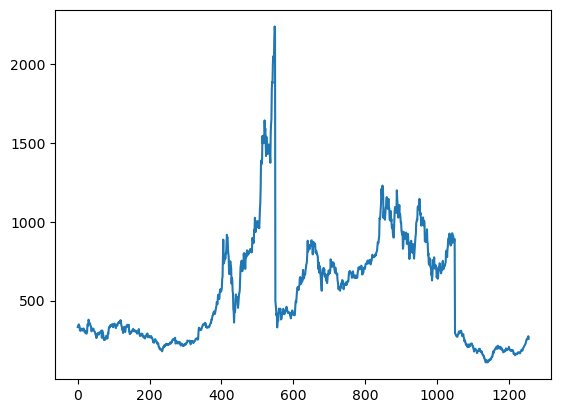

In [114]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [115]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [116]:
import numpy as np

In [117]:
df1

0       333.01
1       342.00
2       344.50
3       349.93
4       342.95
         ...  
1251    256.79
1252    255.90
1253    260.54
1254    274.45
1255    259.46
Name: close, Length: 1256, dtype: float64

In [118]:
from sklearn.preprocessing import MinMaxScaler  # Importing the MinMaxScaler class from sklearn.preprocessing module

scaler = MinMaxScaler(feature_range=(0,1))  # Creating an instance of MinMaxScaler with feature range between 0 and 1

df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))  # Transforming the data in df1 using the scaler instance.
# The np.array(df1) converts the data in df1 to a NumPy array.
# The np.array(df1).reshape(-1, 1) reshapes the array to have a single column, with the number of rows automatically determined.
# The scaler.fit_transform method scales the data using the feature range specified earlier and assigns the scaled data back to df1.


In [119]:
print(df1)

[[0.10555934]
 [0.10977871]
 [0.11095206]
 ...
 [0.07154624]
 [0.07807477]
 [0.07103935]]


In [120]:
len(df1)

1256

In [121]:
1256*0.75

942.0

In [127]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [128]:
training_size,test_size

(942, 314)

In [129]:
train_data

array([[0.10555934],
       [0.10977871],
       [0.11095206],
       [0.11350057],
       [0.11022458],
       [0.10652618],
       [0.09516345],
       [0.09436557],
       [0.09424354],
       [0.0987539 ],
       [0.10061249],
       [0.0989651 ],
       [0.09790909],
       [0.09892286],
       [0.09480675],
       [0.10071574],
       [0.10126018],
       [0.09956117],
       [0.09644005],
       [0.0915683 ],
       [0.08886021],
       [0.09416845],
       [0.09318752],
       [0.08874287],
       [0.0854528 ],
       [0.08919344],
       [0.09046066],
       [0.11331753],
       [0.11267454],
       [0.10977401],
       [0.12741182],
       [0.12307981],
       [0.11468331],
       [0.11611011],
       [0.1165419 ],
       [0.11242579],
       [0.10822519],
       [0.10670453],
       [0.09264778],
       [0.09402764],
       [0.10034497],
       [0.10022294],
       [0.09950015],
       [0.10077676],
       [0.0991106 ],
       [0.09563279],
       [0.09241781],
       [0.091

In [130]:
import numpy  # Importing the numpy module

# A function to convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []  # Initializing two empty lists for storing input and output data
    
    # Iterating over the dataset
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  # Extracting a sequence of values from dataset
        dataX.append(a)  # Appending the sequence to the input data list
        dataY.append(dataset[i + time_step, 0])  # Appending the next value to the output data list
        
    return numpy.array(dataX), numpy.array(dataY)  # Returning the input and output data as numpy arrays


In [138]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
#to calculate next output previous 100 input will be considered
time_step = 150
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [139]:
print(X_train.shape), print(y_train.shape)

(791, 150)
(791,)


(None, None)

In [140]:
print(X_test.shape), print(ytest.shape)

(163, 150)
(163,)


(None, None)

In [141]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [142]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [191]:
time_step

150

In [146]:
model = Sequential()  # Creating a Sequential model

model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))  # Adding an LSTM layer with 50 units, returning sequences, and specifying the input shape
# The input shape is (time_step, 1), where time_step represents the number of time steps in the input sequence

model.add(LSTM(50, return_sequences=True))  # Adding another LSTM layer with 50 units, returning sequences

model.add(LSTM(50))  # Adding a third LSTM layer with 50 units, not returning sequences

model.add(Dense(1))  # Adding a Dense layer with 1 unit

model.compile(loss='mean_squared_error', optimizer='adam')  # Compiling the model with mean squared error loss and Adam optimizer


In [147]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 150, 50)           10400     
                                                                 
 lstm_13 (LSTM)              (None, 150, 50)           20200     
                                                                 
 lstm_14 (LSTM)              (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 23s 762ms/step - loss: 0.0282 - val_loss: 0.0026
Epoch 2/100
13/13 [==============================] - 8s 580ms/step - loss: 0.0098 - val_loss: 0.0029
Epoch 3/100
13/13 [==============================] - 7s 537ms/step - loss: 0.0074 - val_loss: 0.0017
Epoch 4/100
13/13 [==============================] - 8s 571ms/step - loss: 0.0073 - val_loss: 4.3391e-04
Epoch 5/100
13/13 [==============================] - 8s 591ms/step - loss: 0.0060 - val_loss: 1.4567e-04
Epoch 6/100
13/13 [==============================] - 7s 515ms/step - loss: 0.0057 - val_loss: 3.2186e-04
Epoch 7/100
13/13 [==============================] - 8s 603ms/step - loss: 0.0055 - val_loss: 1.5367e-04
Epoch 8/100
13/13 [==============================] - 7s 533ms/step - loss: 0.0054 - val_loss: 1.2864e-04
Epoch 9/100
13/13 [==============================] - 7s 551ms/step - loss: 0.0052 - val_loss: 1.2352e-04
Epoch 10/100
13/13 [==============================] - 8s 606ms/ste

13/13 [==============================] - 3s 239ms/step - loss: 0.0011 - val_loss: 1.4394e-04
Epoch 79/100
13/13 [==============================] - 3s 228ms/step - loss: 0.0010 - val_loss: 8.1866e-05
Epoch 80/100
13/13 [==============================] - 3s 237ms/step - loss: 0.0011 - val_loss: 5.4986e-05
Epoch 81/100
13/13 [==============================] - 3s 234ms/step - loss: 0.0011 - val_loss: 6.7259e-05
Epoch 82/100
13/13 [==============================] - 3s 229ms/step - loss: 0.0010 - val_loss: 4.9734e-05
Epoch 83/100
13/13 [==============================] - 3s 242ms/step - loss: 0.0011 - val_loss: 1.0304e-04
Epoch 84/100
13/13 [==============================] - 3s 251ms/step - loss: 0.0013 - val_loss: 7.4107e-05
Epoch 85/100
13/13 [==============================] - 3s 234ms/step - loss: 0.0013 - val_loss: 1.4173e-04
Epoch 86/100
13/13 [==============================] - 3s 234ms/step - loss: 0.0010 - val_loss: 4.6971e-05
Epoch 87/100
13/13 [==============================] - 3s 23

In [89]:
import tensorflow as tf

In [150]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 44ms/step


In [151]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [192]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

739.8655348613014

In [153]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

191.44570697307392

In [172]:
len(train_predict)

791

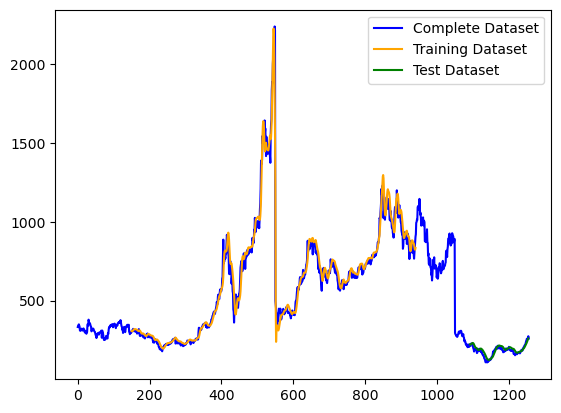

In [193]:
### Plotting 

# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1), color='blue', label='Complete Dataset')

# orange training dataset
plt.plot(trainPredictPlot, color='orange', label='Training Dataset')

# green test dataset
plt.plot(testPredictPlot, color='green', label='Test Dataset')
plt.legend()
plt.show()

In [173]:
len(test_data)

314

In [194]:
#taking previous 150 days data
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape


(1, 150)

In [175]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [177]:
len(temp_input)

150

In [176]:
temp_input

[0.03888484734705372,
 0.04051345833431112,
 0.036993405768192794,
 0.03523337948513364,
 0.033834745265529306,
 0.028052472250252272,
 0.029009926548236448,
 0.03524745969539811,
 0.035087883979067425,
 0.03511604439959637,
 0.03413512308450474,
 0.04064487363011288,
 0.04064487363011288,
 0.04071996808485674,
 0.03489545443878628,
 0.03366108933893412,
 0.03094830216131228,
 0.03066669795602281,
 0.03329969727547932,
 0.02802900523314482,
 0.024804637082580433,
 0.022856874662661633,
 0.023265200760331353,
 0.019773308614741983,
 0.019604346091568303,
 0.013939408161828565,
 0.01383145988313425,
 0.008096120902072138,
 0.007063572149344104,
 0.00046934034214911324,
 0.0021636589773073936,
 0.006439349494285783,
 0.007077652359608576,
 0.0,
 0.002600145495506072,
 0.0010513223664140106,
 0.0023279280970595895,
 0.00547720179288011,
 0.005045408678102929,
 0.007096425973294539,
 0.007256001689625237,
 0.006711566892732272,
 0.01097787060286768,
 0.009705958275643585,
 0.008950320324783

In [221]:
lst_output = []  # List to store the predicted outputs
n_steps = time_step  # Number of time steps
i = 0  # Counter variable
days = 30  # Number of days for prediction

while(i < days):
    if(len(temp_input) > time_step):
        x_input = np.array(temp_input[1:])  # Remove the first element from temp_input
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)  # Reshape the input to have a single row
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape the input to have (1, n_steps, 1) shape
        yhat = model.predict(x_input, verbose=0)  # Predict the output for the input
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())  # Extend temp_input with the predicted output
        temp_input = temp_input[1:]  # Remove the first element from temp_input
        lst_output.extend(yhat.tolist())  # Extend lst_output with the predicted output
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))  # Reshape the input to have (1, n_steps, 1) shape
        yhat = model.predict(x_input, verbose=0)  # Predict the output for the input
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())  # Extend temp_input with the predicted output
        print(len(temp_input))
        lst_output.extend(yhat.tolist())  # Extend lst_output with the predicted output
        i = i + 1

print(lst_output)  # Print the list of predicted outputs


0 day input [0.18740992 0.18915004 0.19091336 0.19270048 0.19451229 0.19634943
 0.19821288 0.20010328 0.20202164 0.20396879 0.20594575 0.20795345
 0.20999295 0.21206529 0.21417165 0.21631306 0.21849094 0.22070646
 0.22296092 0.22525573 0.22759236 0.22997233 0.23239727 0.23486888
 0.23738874 0.23995897 0.24258125 0.24525778 0.24799067 0.25078207
 0.25363445 0.25655031 0.25953221 0.26258296 0.26570544 0.26890278
 0.27217817 0.27553523 0.27897745 0.28250861 0.28613296 0.28985482
 0.29367858 0.2976093  0.30165201 0.30581233 0.31009603 0.3145093
 0.31905866 0.32375124 0.32859439 0.33359617 0.338765   0.34410989
 0.3496404  0.35536689 0.36130014 0.36745179 0.37383404 0.38046023
 0.38734394 0.39450002 0.40194404 0.40969193 0.41776109 0.42616907
 0.43493435 0.44407547 0.45361137 0.46356094 0.47394204 0.48477158
 0.49606422 0.50783092 0.52007848 0.53280658 0.54600608 0.55965525
 0.57371652 0.58813161 0.60281628 0.61765325 0.63248622 0.64711237
 0.66127527 0.67466134 0.68689805 0.69756007 0.7061

6 day output [[0.06778143]]
7 day input [0.20010328 0.20202164 0.20396879 0.20594575 0.20795345 0.20999295
 0.21206529 0.21417165 0.21631306 0.21849094 0.22070646 0.22296092
 0.22525573 0.22759236 0.22997233 0.23239727 0.23486888 0.23738874
 0.23995897 0.24258125 0.24525778 0.24799067 0.25078207 0.25363445
 0.25655031 0.25953221 0.26258296 0.26570544 0.26890278 0.27217817
 0.27553523 0.27897745 0.28250861 0.28613296 0.28985482 0.29367858
 0.2976093  0.30165201 0.30581233 0.31009603 0.3145093  0.31905866
 0.32375124 0.32859439 0.33359617 0.338765   0.34410989 0.3496404
 0.35536689 0.36130014 0.36745179 0.37383404 0.38046023 0.38734394
 0.39450002 0.40194404 0.40969193 0.41776109 0.42616907 0.43493435
 0.44407547 0.45361137 0.46356094 0.47394204 0.48477158 0.49606422
 0.50783092 0.52007848 0.53280658 0.54600608 0.55965525 0.57371652
 0.58813161 0.60281628 0.61765325 0.63248622 0.64711237 0.66127527
 0.67466134 0.68689805 0.69756007 0.70618397 0.71229464 0.71544552
 0.71527308 0.71155763 

13 day output [[0.07974952]]
14 day input [0.21417165 0.21631306 0.21849094 0.22070646 0.22296092 0.22525573
 0.22759236 0.22997233 0.23239727 0.23486888 0.23738874 0.23995897
 0.24258125 0.24525778 0.24799067 0.25078207 0.25363445 0.25655031
 0.25953221 0.26258296 0.26570544 0.26890278 0.27217817 0.27553523
 0.27897745 0.28250861 0.28613296 0.28985482 0.29367858 0.2976093
 0.30165201 0.30581233 0.31009603 0.3145093  0.31905866 0.32375124
 0.32859439 0.33359617 0.338765   0.34410989 0.3496404  0.35536689
 0.36130014 0.36745179 0.37383404 0.38046023 0.38734394 0.39450002
 0.40194404 0.40969193 0.41776109 0.42616907 0.43493435 0.44407547
 0.45361137 0.46356094 0.47394204 0.48477158 0.49606422 0.50783092
 0.52007848 0.53280658 0.54600608 0.55965525 0.57371652 0.58813161
 0.60281628 0.61765325 0.63248622 0.64711237 0.66127527 0.67466134
 0.68689805 0.69756007 0.70618397 0.71229464 0.71544552 0.71527308
 0.71155763 0.70428568 0.69369829 0.68031585 0.66492563 0.64853024
 0.63225484 0.6172296

19 day output [[0.08668309]]
20 day input [0.22759236 0.22997233 0.23239727 0.23486888 0.23738874 0.23995897
 0.24258125 0.24525778 0.24799067 0.25078207 0.25363445 0.25655031
 0.25953221 0.26258296 0.26570544 0.26890278 0.27217817 0.27553523
 0.27897745 0.28250861 0.28613296 0.28985482 0.29367858 0.2976093
 0.30165201 0.30581233 0.31009603 0.3145093  0.31905866 0.32375124
 0.32859439 0.33359617 0.338765   0.34410989 0.3496404  0.35536689
 0.36130014 0.36745179 0.37383404 0.38046023 0.38734394 0.39450002
 0.40194404 0.40969193 0.41776109 0.42616907 0.43493435 0.44407547
 0.45361137 0.46356094 0.47394204 0.48477158 0.49606422 0.50783092
 0.52007848 0.53280658 0.54600608 0.55965525 0.57371652 0.58813161
 0.60281628 0.61765325 0.63248622 0.64711237 0.66127527 0.67466134
 0.68689805 0.69756007 0.70618397 0.71229464 0.71544552 0.71527308
 0.71155763 0.70428568 0.69369829 0.68031585 0.66492563 0.64853024
 0.63225484 0.61722964 0.60446852 0.594778   0.58871406 0.5865916
 0.58853126 0.59452528

25 day output [[0.09275891]]
26 day input [0.24258125 0.24525778 0.24799067 0.25078207 0.25363445 0.25655031
 0.25953221 0.26258296 0.26570544 0.26890278 0.27217817 0.27553523
 0.27897745 0.28250861 0.28613296 0.28985482 0.29367858 0.2976093
 0.30165201 0.30581233 0.31009603 0.3145093  0.31905866 0.32375124
 0.32859439 0.33359617 0.338765   0.34410989 0.3496404  0.35536689
 0.36130014 0.36745179 0.37383404 0.38046023 0.38734394 0.39450002
 0.40194404 0.40969193 0.41776109 0.42616907 0.43493435 0.44407547
 0.45361137 0.46356094 0.47394204 0.48477158 0.49606422 0.50783092
 0.52007848 0.53280658 0.54600608 0.55965525 0.57371652 0.58813161
 0.60281628 0.61765325 0.63248622 0.64711237 0.66127527 0.67466134
 0.68689805 0.69756007 0.70618397 0.71229464 0.71544552 0.71527308
 0.71155763 0.70428568 0.69369829 0.68031585 0.66492563 0.64853024
 0.63225484 0.61722964 0.60446852 0.594778   0.58871406 0.5865916
 0.58853126 0.59452528 0.60450542 0.61839855 0.63616741 0.6578303
 0.6834569  0.71313339 

In [222]:
len(lst_output)

30

In [223]:
day_new=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+1+days)

In [224]:
import matplotlib.pyplot as plt

In [225]:
len(df1)

1256

In [226]:
time_step

150

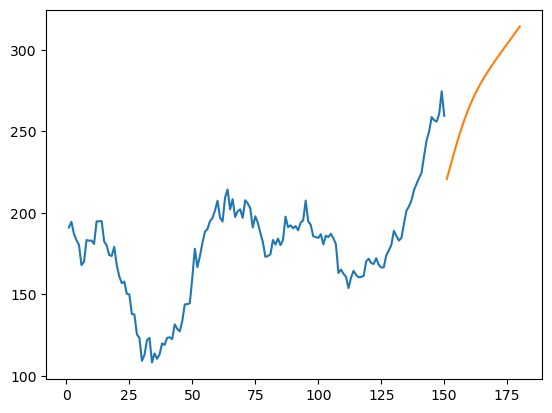

In [227]:
plt.plot(day_new, scaler.inverse_transform(df1[len(df1)-time_step:]))  # Plotting the original data
# day_new represents the time steps for the original data
# scaler.inverse_transform is used to inverse transform the scaled data back to its original scale

plt.plot(day_pred, scaler.inverse_transform(lst_output))  # Plotting the predicted outputs
# day_pred represents the time steps for the predicted outputs
# scaler.inverse_transform is used to inverse transform the scaled predicted outputs back to their original scale

plt.show()  # Displaying the plot


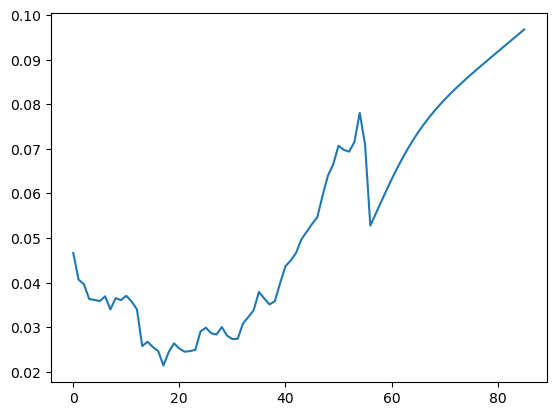

In [228]:
df3 = df1.tolist()  # Convert df1 to a list
df3.extend(lst_output)  # Extend df3 with the predicted outputs

plt.plot(df3[1200:])  # Plot the extended data starting from index 1200
# This assumes that you want to start plotting from a specific index (1200 in this case)

plt.show()  # Display the plot


In [229]:
df3=scaler.inverse_transform(df3).tolist()

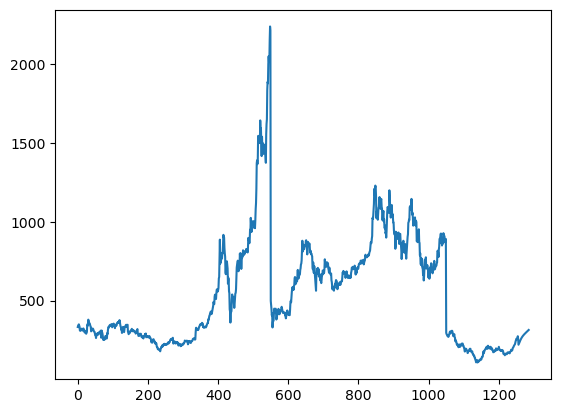

In [230]:
plt.plot(df3)